In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()

## Train Set

In [2]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

## Check for Nan Values

In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Check for duplicates 

In [7]:
df_dup = df.duplicated()
non_duplicate_count = df_dup[df_dup == False].count()
non_duplicate_count

10463

### Remove duplicates 

In [8]:
df = df.drop_duplicates()
df.shape

(10463, 11)

### Drop Nan values

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(10462, 11)

In [11]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Exploratory Data Analysis

* **Convert Date_of_journey into timestamp**

In [12]:
### Extracting Day

df['Journey_day'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [13]:
### Extracting Month

df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

### For Departure time

In [16]:
### Extraxt Hour

df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

In [17]:
### Extraxt Minutes

df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [18]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [19]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


### For Arrival Time

In [20]:
### Extraxt Hour

df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

In [21]:
### Extraxt Minutes

df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [22]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [23]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### For Duration

In [24]:
duration = list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Adds 0 minute with a space
        
        else:
            duration[i] = "0h " + duration[i]    # Adds 0 Hour with a space
            
Duration_Hour = []
Duration_Min = []

for i in range(len(duration)):
    Duration_Hour.append(int(duration[i].split(sep='h')[0]))  # Extract Hours
    Duration_Min.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [25]:
df['Duration_Hour'] = Duration_Hour
df['Duration_Min'] = Duration_Min

In [26]:
df.drop(['Duration'],axis=1,inplace=True)

In [27]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data

* **Nominal data - data not in order(One Hot Encoding)**
* **Ordinal data - data in order(LabelEncoder)**

In [28]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

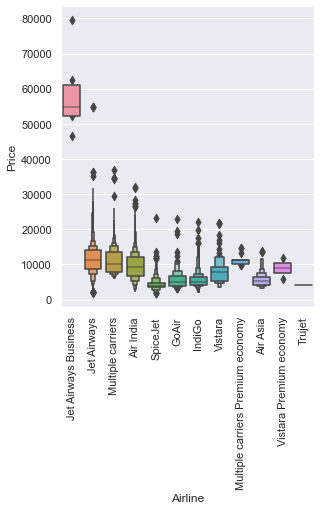

In [29]:
### Airline vs Price

sns.catplot(x='Airline', y='Price', data=df.sort_values("Price", ascending=False), kind='boxen')
plt.xticks(rotation=90) 
plt.show()

In [30]:
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline,drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [31]:
df['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

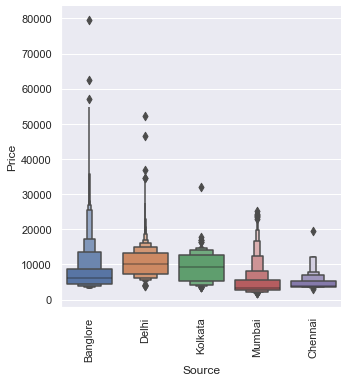

In [32]:
### Source vs Price

sns.catplot(x='Source', y='Price', data=df.sort_values("Price", ascending=False), kind='boxen')
plt.xticks(rotation=90) 
plt.show()

In [33]:
Source = df[['Source']]
Source = pd.get_dummies(Source,drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
df['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

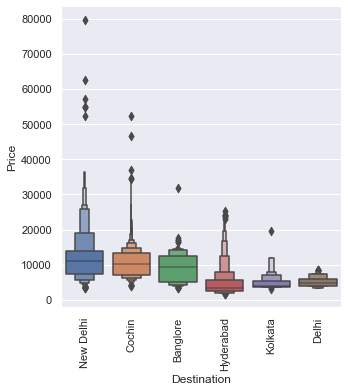

In [35]:
### Desination vs Price

sns.catplot(x='Destination', y='Price', data=df.sort_values("Price", ascending=False), kind='boxen')
plt.xticks(rotation=90) 
plt.show()

In [36]:
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [37]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10462, dtype: object

In [38]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)   # both are related

In [39]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [40]:
#### For stops we use ordinal encoding 

df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace =True)

In [41]:
df['Total_Stops'].value_counts()

1    5625
0    3475
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64

In [42]:
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [43]:
#### concatenate dataframe --  df + airline + source + destination

df_train = pd.concat([df,Airline,Source,Destination],axis=1)

In [44]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


In [45]:
df.shape

(10462, 10)

## Test Set

In [46]:
df2 = pd.read_excel(r"Test_set.xlsx")
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [47]:
df2.shape

(2671, 10)

In [48]:
df2 = df2.drop_duplicates()
df2.shape

(2645, 10)

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2645 non-null   object
 1   Date_of_Journey  2645 non-null   object
 2   Source           2645 non-null   object
 3   Destination      2645 non-null   object
 4   Route            2645 non-null   object
 5   Dep_Time         2645 non-null   object
 6   Arrival_Time     2645 non-null   object
 7   Duration         2645 non-null   object
 8   Total_Stops      2645 non-null   object
 9   Additional_Info  2645 non-null   object
dtypes: object(10)
memory usage: 227.3+ KB


In [50]:
df2.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [51]:
### Extracting Day

df2['Journey_day'] = pd.to_datetime(df2['Date_of_Journey'], format="%d/%m/%Y").dt.day

### Extracting Month

df2['Journey_month'] = pd.to_datetime(df2['Date_of_Journey'], format="%d/%m/%Y").dt.month

df2.drop(['Date_of_Journey'],axis=1,inplace=True)

### Extract Hour

df2['Dep_Hour'] = pd.to_datetime(df2['Dep_Time']).dt.hour

### Extract Minutes
df2['Dep_Min'] = pd.to_datetime(df2['Dep_Time']).dt.minute

df2.drop(['Dep_Time'],axis=1,inplace=True)

### Extraxt Hour

df2['Arrival_Hour'] = pd.to_datetime(df2['Arrival_Time']).dt.hour

### Extraxt Minutes

df2['Arrival_Min'] = pd.to_datetime(df2['Arrival_Time']).dt.minute

df2.drop(['Arrival_Time'],axis=1,inplace=True)


## Duration

duration = list(df2['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Adds 0 minute with a space
        
        else:
            duration[i] = "0h " + duration[i]    # Adds 0 Hour with a space
            
Duration_Hour = []
Duration_Min = []

for i in range(len(duration)):
    Duration_Hour.append(int(duration[i].split(sep='h')[0]))  # Extract Hours
    Duration_Min.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [52]:
df2['Duration_Hour'] = Duration_Hour
df2['Duration_Min'] = Duration_Min

In [53]:
df2.drop(['Duration'],axis=1,inplace=True)

In [54]:
print('Airline')
df2['Airline'].value_counts()
Airline = pd.get_dummies(df2['Airline'],drop_first = True)

print()

print('Source')
df2['Source'].value_counts()
Source = pd.get_dummies(df2['Source'],drop_first = True)

print()

print('Destination')
df2['Destination'].value_counts()
Destination = pd.get_dummies(df2['Destination'],drop_first = True)

df2.drop(['Route','Additional_Info'],axis=1,inplace=True)   # both are related

df2.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace =True)

df2.drop(['Airline','Source','Destination'],axis=1,inplace=True)

print()
print()


Airline

Source

Destination




In [55]:
df2_test = pd.concat([df2,Airline,Source,Destination],axis=1)

In [56]:
df2_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


## Feature Selection

* **Finding relation with target variable**

`1` heatmap
`2` Feature_importance_
`3` SelectKbest

In [57]:
df_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hour',
       'Duration_Min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [58]:
X = df_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hour',
       'Duration_Min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [59]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
y = df_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

### Correlation matrix

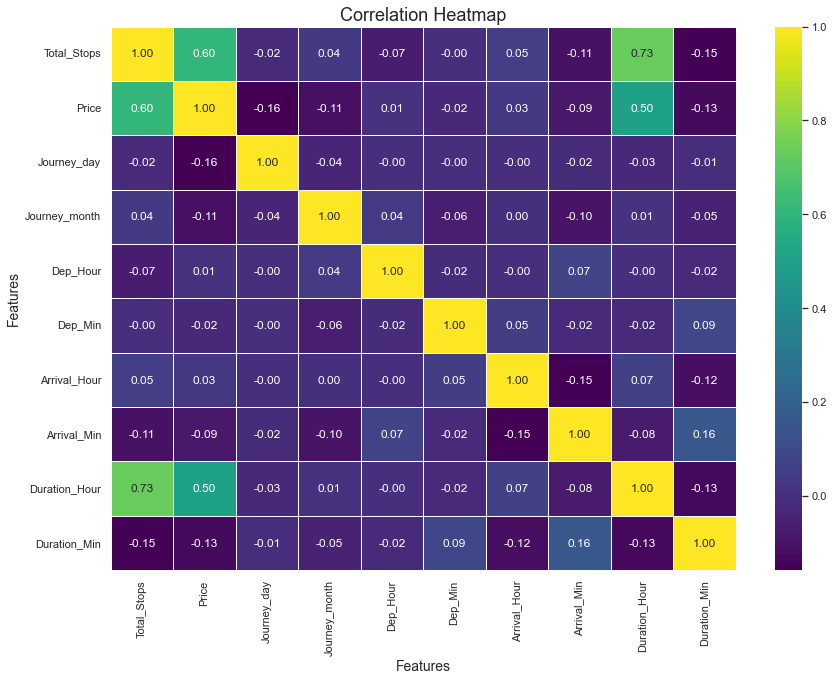

In [61]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)

# Customize plot labels and title
plt.title("Correlation Heatmap", fontsize=18)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Display the plot
plt.show()

In [62]:
### Import ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [63]:
print(model.feature_importances_)

[2.20842399e-01 1.43868700e-01 5.34961783e-02 2.41830049e-02
 2.11241091e-02 2.85519369e-02 1.94394036e-02 1.34369933e-01
 1.72420143e-02 1.05733874e-02 1.98493528e-03 1.47928471e-02
 1.34505579e-01 6.89988450e-02 2.06654245e-02 8.65918129e-04
 2.83549717e-03 1.06178726e-04 5.13746678e-03 8.36987483e-05
 4.96822290e-04 8.77973576e-03 3.39407494e-03 5.98973404e-03
 1.41220023e-02 1.11435425e-02 6.46315744e-03 4.69711802e-04
 2.54737618e-02]


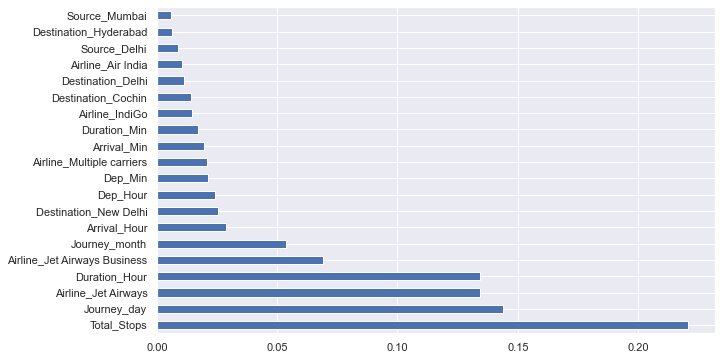

In [64]:
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(20).plot(kind = 'barh')
plt.show()

### Fitting model using Random Forest

In [65]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [67]:
y_pred = rf.predict(x_test)

In [68]:
rf.score(x_train,y_train)

0.9533315535730569

In [69]:
rf.score(x_test,y_test)

0.813234440757796

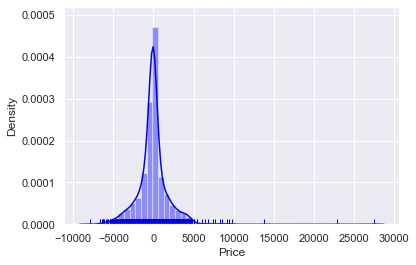

In [70]:
sns.distplot(y_test-y_pred, hist=True, kde=True, rug=True, color='blue')
plt.show()

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('Mean Absolute Error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score : ',r2_score(y_test,y_pred))

Mean Absolute Error :  1177.5807537998578
Mean Squared Error :  3894113.528074491
Root Mean Squared Error :  1973.3508375538524
R2 score :  0.813234440757796


## Hyperparameter Tuning

In [72]:
from sklearn.model_selection import RandomizedSearchCV

n_estimator = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

max_features = ['auto','sqrt']

max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]

### Create random grid

In [73]:
random_grid =  {
    'n_estimators' : n_estimator,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [74]:
rf_randomized = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [75]:
rf_randomized.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [76]:
rf_randomized.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [77]:
preds = rf_randomized.predict(x_test)

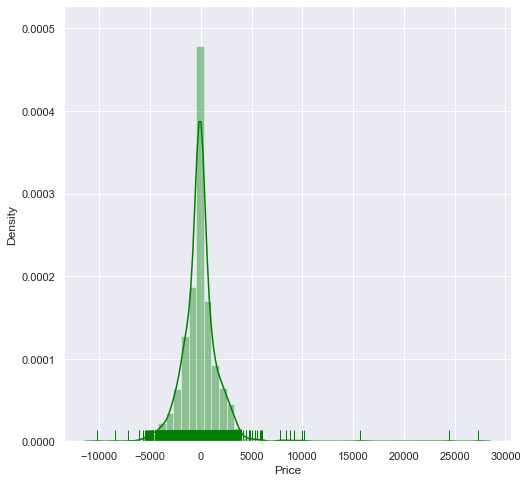

In [79]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-preds, hist=True, kde=True, rug=True, color='green')
plt.show()


In [80]:
print('Mean Absolute Error : ',mean_absolute_error(y_test,preds))
print('Mean Squared Error : ',mean_squared_error(y_test,preds))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,preds)))
print('R2 score : ',r2_score(y_test,preds))

Mean Absolute Error :  1149.9142769102923
Mean Squared Error :  3514059.67226744
Root Mean Squared Error :  1874.582532796953
R2 score :  0.8314622018156657


In [81]:
import pickle

file = open('Fare_rf.pkl','wb')

pickle.dump(rf,file)